#Original Raw Dataset

In [ ]:
import pandas as pd
file_path='/content/Original UK data.csv'
df=pd.read_csv(file_path)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Dependency Ratio,Unnamed: 12,Unnamed: 13,Median Age,Unnamed: 15,Unnamed: 16
0,Name,Region,GENC,Year,Total Population,Growth Rate,Population Density (per sq km),Total Fertility Rate,Life Expectancy at Birth,Under-5 Mortality Rate,Sex Ratio of the Population,Youth and Old Age (0-14 and 65+),Youth (0-14),Old Age (65+),Both Sexes,Male,Female
1,-> 1950,NaN,NaN,NaN,--,--,--,--,--,--,--,--,--,--,--,--,--
2,United Kingdom,"1950,United Kingdom",GB,1950,"5,01,27,000",--,207.2,--,--,--,--,--,--,--,--,--,--
3,-> 1951,NaN,NaN,NaN,--,--,--,--,--,--,--,--,--,--,--,--,--
4,United Kingdom,"1951,United Kingdom",GB,1951,"5,02,90,000",--,207.9,--,--,--,--,--,--,--,--,--,--


* This is a demographic dataset focusing on UK population metrics from 1950-2024

* The dataset tracks multiple demographic indicators including population totals, density, growth rates, and mortality statistics

* Many fields in the dataset are incomplete, marked with "-" or "NaN" values

#Cleaned Dataset

In [ ]:
import pandas as pd

file_path='/content/Cleaned UK data.csv'
df=pd.read_csv(file_path)
df.head()

,Country Name,Year,Population,Growth Rate,Population Density (per sq km),Total Fertility Rate,Life Expectancy at Birth,Under-5 Mortality Rate,Sex Ratio of the Population,Youth and Old Age (0-14 and 65+),Youth (0-14),Old Age (65+),Both Sexes,Male,Female
0,United Kingdom,1950,50127000.0,--,207.2,--,--,--,--,--,--,--,--,--,--
1,United Kingdom,1951,50290000.0,--,207.9,--,--,--,--,--,--,--,--,--,--
2,United Kingdom,1952,50430000.0,--,208.4,--,--,--,--,--,--,--,--,--,--
3,United Kingdom,1953,50593000.0,--,209.1,--,--,--,--,--,--,--,--,--,--
4,United Kingdom,1954,50765000.0,--,209.8,--,--,--,--,--,--,--,--,--,--


* Removed unavailable data containing '--'

In [ ]:
df = df.iloc[41:, :]
df.head()

,Country Name,Year,Population,Growth Rate,Population Density (per sq km),Total Fertility Rate,Life Expectancy at Birth,Under-5 Mortality Rate,Sex Ratio of the Population,Youth and Old Age (0-14 and 65+),Youth (0-14),Old Age (65+),Both Sexes,Male,Female
41,United Kingdom,1991,57573614.0,0.33,238.0,1.84,75.80,8.80,0.95,53.70,29.50,24.20,35.80,37.50,34.20
42,United Kingdom,1992,57735939.0,0.23,238.6,1.81,76.20,7.80,0.95,54.20,29.80,24.40,35.90,37.50,34.40
43,United Kingdom,1993,57854242.0,0.18,239.1,1.78,76.10,7.60,0.95,54.50,30.10,24.40,36.00,37.60,34.60
44,United Kingdom,1994,58005686.0,0.35,239.8,1.76,76.60,7.30,0.96,54.60,30.20,24.40,36.20,37.70,34.80
45,United Kingdom,1995,58186803.0,0.28,240.5,1.73,76.50,7.20,0.96,54.50,30.10,24.40,36.40,37.80,35.00


* Changing the columns into requried dtype & resetting index

In [ ]:
df = df[['Year', 'Population', 'Growth Rate', 'Population Density (per sq km)',
         'Youth and Old Age (0-14 and 65+)', 'Youth (0-14)', 'Old Age (65+)']]

for column in ['Growth Rate','Youth and Old Age (0-14 and 65+)',
               'Youth (0-14)', 'Old Age (65+)']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.reset_index(drop=True, inplace=True)
df.dtypes

,0
Year,int64
Population,float64
Growth Rate,float64
Population Density (per sq km),float64
Youth and Old Age (0-14 and 65+),float64
Youth (0-14),float64
Old Age (65+),float64


* Feature Engineering & Year as index





In [ ]:
df['Working Age (15-64)']     =df['Population']-df['Youth (0-14)']-df['Old Age (65+)']
df['Youth Dependency Ratio']  =100*(df['Youth (0-14)']/df['Working Age (15-64)'])
df['Old Age Dependency Ratio']=100*(df['Old Age (65+)']/df['Working Age (15-64)'])
df['Dependency Ratio']        =100*(df['Youth (0-14)']+df['Old Age (65+)'])/df['Working Age (15-64)']

df = df[['Year', 'Population', 'Growth Rate', 'Population Density (per sq km)',
         'Dependency Ratio','Youth Dependency Ratio', 'Old Age Dependency Ratio']].set_index('Year')
df.index = pd.to_datetime(df.index, format='%Y')
df.head()

,Population,Growth Rate,Population Density (per sq km),Dependency Ratio,Youth Dependency Ratio,Old Age Dependency Ratio
Year,,,,,,
1991-01-01,57573614.0,0.33,238.0,0.000093,0.000051,0.000042
1992-01-01,57735939.0,0.23,238.6,0.000094,0.000052,0.000042
1993-01-01,57854242.0,0.18,239.1,0.000094,0.000052,0.000042
1994-01-01,58005686.0,0.35,239.8,0.000094,0.000052,0.000042
1995-01-01,58186803.0,0.28,240.5,0.000094,0.000052,0.000042


In [ ]:
df.to_csv('cleaned data.csv')

# ***LONG-SHORT TERM MEMORY***

> **STEP-1**
* Create Lag values perfectly

In [ ]:
df['GR Lag 7'] = df['Growth Rate'].shift(7)
df['PD Lag 6'] = df['Population Density (per sq km)'].shift(6)
df['DR Lag 7'] = df['Dependency Ratio'].shift(7)
df['YDR Lag 6'] = df['Youth Dependency Ratio'].shift(6)
df['ODR Lag 7']= df['Old Age Dependency Ratio'].shift(7)
#df.head()

In [ ]:
df.describe()

,Population,Growth Rate,Population Density (per sq km),Dependency Ratio,Youth Dependency Ratio,Old Age Dependency Ratio,GR Lag 7,PD Lag 6,DR Lag 7,YDR Lag 6,ODR Lag 7
count,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,27.000000,28.000000,27.000000,28.000000,27.000000
mean,6.214508e+07,0.521765,256.876471,0.000086,0.000045,0.000041,0.513333,252.071429,0.000087,0.000046,0.000041
std,3.553709e+06,0.181867,14.683119,0.000005,0.000005,0.000002,0.201284,11.237828,0.000005,0.000004,0.000001
min,5.757361e+07,0.180000,238.000000,0.000081,0.000038,0.000039,0.180000,238.000000,0.000081,0.000041,0.000039
25%,5.896725e+07,0.390000,243.750000,0.000083,0.000041,0.000040,0.355000,242.400000,0.000083,0.000042,0.000040
50%,6.145314e+07,0.570000,254.050000,0.000084,0.000043,0.000042,0.570000,249.250000,0.000086,0.000045,0.000041
75%,6.522530e+07,0.657500,269.600000,0.000091,0.000050,0.000042,0.670000,260.875000,0.000092,0.000051,0.000042
max,6.845906e+07,0.820000,283.000000,0.000094,0.000052,0.000044,0.820000,273.600000,0.000094,0.000052,0.000043


> **STEP-2**
*  Replace Nan with median

In [ ]:
df.fillna(df.median(), inplace=True)
#df.head()

*  Removing Features

In [ ]:
features = ['Growth Rate','Population Density (per sq km)','Dependency Ratio','Youth Dependency Ratio','Old Age Dependency Ratio']
lagged_features=['GR Lag 7','PD Lag 6','DR Lag 7','YDR Lag 6','ODR Lag 7']
df.drop(features, axis=1, inplace=True)
df.head()

,Population,GR Lag 7,PD Lag 6,DR Lag 7,YDR Lag 6,ODR Lag 7
Year,,,,,,
1991-01-01,57573614.0,0.57,249.25,0.000086,0.000045,0.000041
1992-01-01,57735939.0,0.57,249.25,0.000086,0.000045,0.000041
1993-01-01,57854242.0,0.57,249.25,0.000086,0.000045,0.000041
1994-01-01,58005686.0,0.57,249.25,0.000086,0.000045,0.000041
1995-01-01,58186803.0,0.57,249.25,0.000086,0.000045,0.000041


> **STEP-3**
* Create Sequences for each Lagged Feature

In [ ]:
import numpy as np
X= df[lagged_features]
y = df['Population']

def create_sequences(X,y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        'GR Lag 7	PD Lag 6	DR Lag 7	YDR Lag 6	ODR Lag 7'
        row1 = [[k['GR Lag 7']] for index, k in X[i:i+time_steps].iterrows()]
        #row2 = [[k['PD Lag 6']] for index, k in X[i:i+time_steps].iterrows()]
        #row3 = [[k['DR Lag 7']] for index, k in X[i:i+time_steps].iterrows()]
        #row4 = [[k['YDR Lag 6']] for index, k in X[i:i+time_steps].iterrows()]
        #row5 = [[k['ODR Lag 7']] for index, k in X[i:i+time_steps].iterrows()]
        print(row1)
        Xs.append(row1)
        ys.append(y[i + time_steps])
    return np.array(Xs) ,np.array(ys)
time_steps=3
X_seq ,y_seq=create_sequences(X,y, time_steps)

[[0.57], [0.57], [0.57]]
[[0.57], [0.57], [0.57]]
[[0.57], [0.57], [0.57]]
[[0.57], [0.57], [0.57]]
[[0.57], [0.57], [0.57]]
[[0.57], [0.57], [0.33]]
[[0.57], [0.33], [0.23]]
[[0.33], [0.23], [0.18]]
[[0.23], [0.18], [0.35]]
[[0.18], [0.35], [0.28]]
[[0.35], [0.28], [0.26]]
[[0.28], [0.26], [0.25]]
[[0.26], [0.25], [0.39]]
[[0.25], [0.39], [0.39]]
[[0.39], [0.39], [0.39]]
[[0.39], [0.39], [0.4]]
[[0.39], [0.4], [0.36]]
[[0.4], [0.36], [0.39]]
[[0.36], [0.39], [0.63]]
[[0.39], [0.63], [0.57]]
[[0.63], [0.57], [0.62]]
[[0.57], [0.62], [0.7]]
[[0.62], [0.7], [0.62]]
[[0.7], [0.62], [0.65]]
[[0.62], [0.65], [0.81]]
[[0.65], [0.81], [0.76]]
[[0.81], [0.76], [0.68]]
[[0.76], [0.68], [0.66]]
[[0.68], [0.66], [0.82]]
[[0.66], [0.82], [0.8]]
[[0.82], [0.8], [0.67]]


* Sequential Data

In [ ]:
import numpy as np
#1
GRdata = [[0.57, 0.57, 0.57], [0.57, 0.57, 0.57], [0.57, 0.57, 0.57], [0.57, 0.57, 0.57], [0.57, 0.57, 0.57],
          [0.57, 0.57, 0.33], [0.57, 0.33, 0.23], [0.33, 0.23, 0.18], [0.23, 0.18, 0.35], [0.18, 0.35, 0.28],
          [0.35, 0.28, 0.26], [0.28, 0.26, 0.25], [0.26, 0.25, 0.39], [0.25, 0.39, 0.39], [0.39, 0.39, 0.39],
          [0.39, 0.39, 0.4], [0.39, 0.4, 0.36], [0.4, 0.36, 0.39], [0.36, 0.39, 0.63], [0.39, 0.63, 0.57],
          [0.63, 0.57, 0.62], [0.57, 0.62, 0.7], [0.62, 0.7, 0.62], [0.7, 0.62, 0.65], [0.62, 0.65, 0.81],
          [0.65, 0.81, 0.76], [0.81, 0.76, 0.68], [0.76, 0.68, 0.66], [0.68, 0.66, 0.82], [0.66, 0.82, 0.8],
          [0.82, 0.8, 0.67]]
#2
PDdata =[[249.25, 249.25, 249.25], [249.25, 249.25, 249.25], [249.25, 249.25, 249.25], [249.25, 249.25, 249.25],
         [249.25, 249.25, 238.0], [249.25, 238.0, 238.6], [238.0, 238.6, 239.1], [238.6, 239.1, 239.8],
         [239.1, 239.8, 240.5], [239.8, 240.5, 241.2], [240.5, 241.2, 241.8], [241.2, 241.8, 242.6],
         [241.8, 242.6, 243.5], [242.6, 243.5, 244.5], [243.5, 244.5, 245.4], [244.5, 245.4, 246.4],
         [245.4, 246.4, 247.3], [246.4, 247.3, 248.5], [247.3, 248.5, 250.0], [248.5, 250.0, 251.5],
         [250.0, 251.5, 253.2], [251.5, 253.2, 254.9], [253.2, 254.9, 256.5], [254.9, 256.5, 258.3],
         [256.5, 258.3, 260.4], [258.3, 260.4, 262.3], [260.4, 262.3, 264.0], [262.3, 264.0, 266.0],
         [264.0, 266.0, 268.1], [266.0, 268.1, 270.1], [268.1, 270.1, 271.9]]
#3
DRdata = [[8.57e-05, 8.57e-05, 8.57e-05], [8.57e-05, 8.57e-05, 8.57e-05], [8.57e-05, 8.57e-05, 8.57e-05], [8.57e-05, 8.57e-05, 8.57e-05],
    [8.57e-05, 8.57e-05, 8.57e-05], [8.57e-05, 8.57e-05, 9.33e-05], [8.57e-05, 9.33e-05, 9.39e-05], [9.33e-05, 9.39e-05, 9.42e-05],
    [9.39e-05, 9.42e-05, 9.41e-05], [9.42e-05, 9.41e-05, 9.37e-05], [9.41e-05, 9.37e-05, 9.31e-05], [9.37e-05, 9.31e-05, 9.27e-05],
    [9.31e-05, 9.27e-05, 9.2e-05], [9.27e-05, 9.2e-05, 9.1e-05], [9.2e-05, 9.1e-05, 9e-05], [9.1e-05, 9e-05, 8.89e-05],
    [9e-05, 8.89e-05, 8.77e-05], [8.89e-05, 8.77e-05, 8.68e-05], [8.77e-05, 8.68e-05, 8.57e-05], [8.68e-05, 8.57e-05, 8.43e-05],
    [8.57e-05, 8.43e-05, 8.28e-05], [8.43e-05, 8.28e-05, 8.2e-05], [8.28e-05, 8.2e-05, 8.14e-05], [8.2e-05, 8.14e-05, 8.15e-05],
    [8.14e-05, 8.15e-05, 8.14e-05], [8.15e-05, 8.14e-05, 8.16e-05], [8.14e-05, 8.16e-05, 8.27e-05], [8.16e-05, 8.27e-05, 8.34e-05],
    [8.27e-05, 8.34e-05, 8.38e-05], [8.34e-05, 8.38e-05, 8.37e-05], [8.38e-05, 8.37e-05, 8.37e-05]]
#4
YDRdata =[[4.535e-05, 4.535e-05, 4.535e-05], [4.535e-05, 4.535e-05, 4.535e-05], [4.535e-05, 4.535e-05, 4.535e-05], [4.535e-05, 4.535e-05, 4.535e-05],
    [4.535e-05, 4.535e-05, 5.12e-05], [4.535e-05, 5.12e-05, 5.16e-05], [5.12e-05, 5.16e-05, 5.2e-05], [5.16e-05, 5.2e-05, 5.21e-05],
    [5.2e-05, 5.21e-05, 5.17e-05], [5.21e-05, 5.17e-05, 5.12e-05], [5.17e-05, 5.12e-05, 5.09e-05], [5.12e-05, 5.09e-05, 5.06e-05],
    [5.09e-05, 5.06e-05, 5.01e-05], [5.06e-05, 5.01e-05, 4.94e-05], [5.01e-05, 4.94e-05, 4.85e-05], [4.94e-05, 4.85e-05, 4.76e-05],
    [4.85e-05, 4.76e-05, 4.68e-05], [4.76e-05, 4.68e-05, 4.59e-05], [4.68e-05, 4.59e-05, 4.48e-05], [4.59e-05, 4.48e-05, 4.39e-05],
    [4.48e-05, 4.39e-05, 4.33e-05], [4.39e-05, 4.33e-05, 4.27e-05], [4.33e-05, 4.27e-05, 4.24e-05], [4.27e-05, 4.24e-05, 4.21e-05],
    [4.24e-05, 4.21e-05, 4.19e-05], [4.21e-05, 4.19e-05, 4.19e-05], [4.19e-05, 4.19e-05, 4.18e-05], [4.19e-05, 4.18e-05, 4.16e-05],
    [4.18e-05, 4.16e-05, 4.15e-05], [4.16e-05, 4.15e-05, 4.13e-05], [4.15e-05, 4.13e-05, 4.13e-05]]
#5
ODRdata =[[4.09e-05, 4.09e-05, 4.09e-05], [4.09e-05, 4.09e-05, 4.09e-05], [4.09e-05, 4.09e-05, 4.09e-05], [4.09e-05, 4.09e-05, 4.09e-05],
    [4.09e-05, 4.09e-05, 4.09e-05], [4.09e-05, 4.09e-05, 4.2e-05], [4.09e-05, 4.2e-05, 4.23e-05], [4.2e-05, 4.23e-05, 4.22e-05],
    [4.23e-05, 4.22e-05, 4.21e-05], [4.22e-05, 4.21e-05, 4.19e-05], [4.21e-05, 4.19e-05, 4.18e-05], [4.19e-05, 4.18e-05, 4.17e-05],
    [4.18e-05, 4.17e-05, 4.14e-05], [4.17e-05, 4.14e-05, 4.09e-05], [4.14e-05, 4.09e-05, 4.06e-05], [4.09e-05, 4.06e-05, 4.04e-05],
    [4.06e-05, 4.04e-05, 4.01e-05], [4.04e-05, 4.01e-05, 4e-05], [4.01e-05, 4e-05, 3.97e-05], [4e-05, 3.97e-05, 3.95e-05],
    [3.97e-05, 3.95e-05, 3.9e-05], [3.95e-05, 3.9e-05, 3.87e-05], [3.9e-05, 3.87e-05, 3.88e-05], [3.87e-05, 3.88e-05, 3.92e-05],
    [3.88e-05, 3.92e-05, 3.94e-05], [3.92e-05, 3.94e-05, 3.97e-05], [3.94e-05, 3.97e-05, 4.08e-05], [3.97e-05, 4.08e-05, 4.16e-05],
    [4.08e-05, 4.16e-05, 4.21e-05], [4.16e-05, 4.21e-05, 4.22e-05], [4.21e-05, 4.22e-05, 4.24e-05]]

type(np.array([GRdata,PDdata,DRdata,YDRdata,ODRdata]))

numpy.ndarray

In [ ]:
import numpy as np
new_data = np.array([GRdata, PDdata, DRdata, YDRdata, ODRdata])
#new_data#(5, 31, 3)

In [ ]:
import pandas as pd

df_GR = pd.DataFrame(GRdata, columns=['GR1', 'GR2', 'GR3'])
df_PD = pd.DataFrame(PDdata, columns=['PD1', 'PD2', 'PD3'])
df_DR = pd.DataFrame(DRdata, columns=['DR1', 'DR2', 'DR3'])
df_YDR = pd.DataFrame(YDRdata, columns=['YDR1', 'YDR2', 'YDR3'])
df_ODR = pd.DataFrame(ODRdata, columns=['ODR1', 'ODR2', 'ODR3'])

combined_df = pd.concat([df_GR, df_PD, df_DR, df_YDR, df_ODR], axis=1)
combined_df.head()#(31, 15)

,GR1,GR2,GR3,PD1,PD2,PD3,DR1,DR2,DR3,YDR1,YDR2,YDR3,ODR1,ODR2,ODR3
0,0.57,0.57,0.57,249.25,249.25,249.25,0.000086,0.000086,0.000086,0.000045,0.000045,0.000045,0.000041,0.000041,0.000041
1,0.57,0.57,0.57,249.25,249.25,249.25,0.000086,0.000086,0.000086,0.000045,0.000045,0.000045,0.000041,0.000041,0.000041
2,0.57,0.57,0.57,249.25,249.25,249.25,0.000086,0.000086,0.000086,0.000045,0.000045,0.000045,0.000041,0.000041,0.000041
3,0.57,0.57,0.57,249.25,249.25,249.25,0.000086,0.000086,0.000086,0.000045,0.000045,0.000045,0.000041,0.000041,0.000041
4,0.57,0.57,0.57,249.25,249.25,238.00,0.000086,0.000086,0.000086,0.000045,0.000045,0.000051,0.000041,0.000041,0.000041


In [ ]:
x_new=combined_df
y_new=y_seq
x_new.shape,y_new.shape

((31, 15), (31,))

> **STEP-4**
* Min-Max normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_new)
y_scaled = scaler.fit_transform(y_new.reshape(-1,1))

In [ ]:
split_index =  int(0.8 * len(X_scaled))
Xtrain, Xtest = X_scaled[:split_index], X_scaled[split_index:]
ytrain, ytest = y_scaled[:split_index], y_scaled[split_index:]
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((24, 15), (7, 15), (24, 1), (7, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(3, input_shape=(15,1), return_sequences=True))
model.add(LSTM(3, activation = 'relu', return_sequences=True))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 15, 3)               │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 15, 3)               │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

> STEP-5
* Lstm Model
* 64 layers then 8 layers then process into 1 layer



In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(units=64,return_sequences=True,input_shape=(15,1)))
model.add(LSTM(units=8))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(Xtrain, ytrain, epochs=50, batch_size=16,
                    validation_data=(Xtest, ytest), verbose=1,
                    shuffle=False)
y_pred = model.predict(Xtest)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 703ms/step - loss: 0.0534 - val_loss: 0.1993
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1880 - val_loss: 0.3079
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1068 - val_loss: 0.3778
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0684 - val_loss: 0.3967
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0531 - val_loss: 0.3727
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0459 - val_loss: 0.3136
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0435 - val_loss: 0.2354
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0482 - val_loss: 0.1704
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0565 - val_loss: 0.1515
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0547 - val_loss: 0.1797
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0438 - val_loss: 0.2029
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0366 - val_loss: 0.1549


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


* Making Year as index

In [ ]:
import pandas as pd
Y = y[3:]
train_len = int(len(Y) * 0.8)
train_index = Y.index[:train_len]
test_index = Y.index[train_len:]

ytrain_rescaled = scaler.inverse_transform(y_scaled)
df_ytrain_rescaled = pd.DataFrame(ytrain_rescaled, columns=['Population'], index=Y.index)
df_ytrain_rescaled = df_ytrain_rescaled[~df_ytrain_rescaled.index.isin(pd.to_datetime(['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']))]
#df_ytrain_rescaled

* Predicted Data

In [ ]:
y_pred_rescaled=scaler.inverse_transform(y_pred)
y_pred_rescaled#predicted Data

array([[62057388.],
       [60709644.],
       [58882272.],
       [57005884.],
       [55110076.],
       [54168948.],
       [53738888.]], dtype=float32)

*   Test Data

In [ ]:
ytest_rescaled=scaler.inverse_transform(ytest)
ytest_rescaled#test data

array([[66196401.],
       [66603767.],
       [67022855.],
       [67419123.],
       [67791400.],
       [68138484.],
       [68459055.]])

In [ ]:
df_results=pd.DataFrame({'Actual':ytest_rescaled.flatten(),'Predicted':y_pred_rescaled.flatten()}, index=test_index)
df_results

,Actual,Predicted
Year,,
2018-01-01,66196401.0,62057388.0
2019-01-01,66603767.0,60709644.0
2020-01-01,67022855.0,58882272.0
2021-01-01,67419123.0,57005884.0
2022-01-01,67791400.0,55110076.0
2023-01-01,68138484.0,54168948.0
2024-01-01,68459055.0,53738888.0


> PLOT

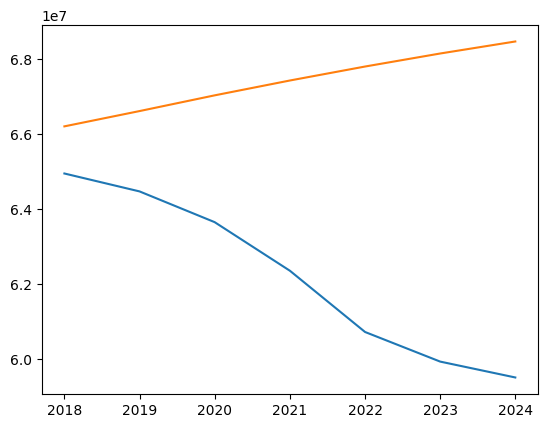

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_results['Predicted'])
plt.plot(df_results['Actual'])

> STEP-6
* PLot & Evalutation metrics

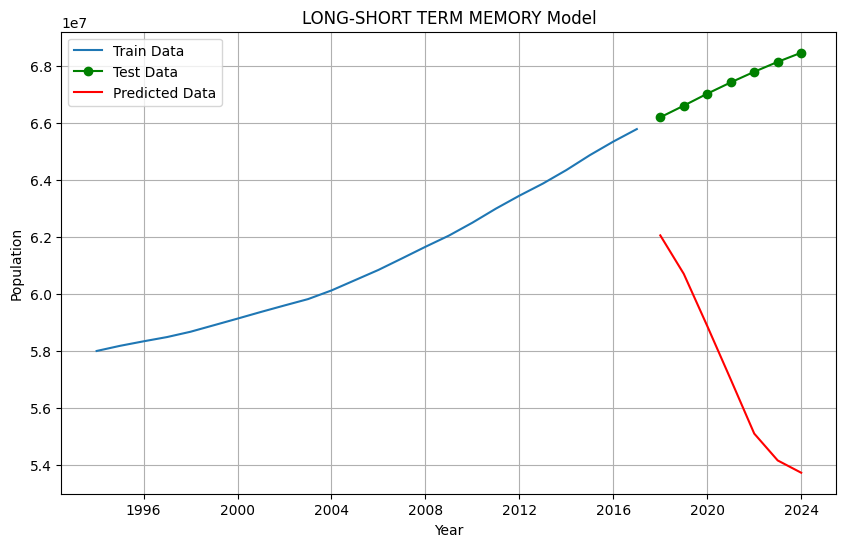


RMSE: 10685263.44 MAPE: 14.77%


In [ ]:
import matplotlib.pyplot as plt

df_results = pd.DataFrame({'Actual': ytest_rescaled.flatten(),'Predicted': y_pred_rescaled.flatten()}, index=test_index)

plt.figure(figsize=(10, 6))
plt.plot(df_ytrain_rescaled.index, df_ytrain_rescaled['Population'], label="Train Data")
plt.plot(df_results.index, df_results['Actual'], label="Test Data", color='green', marker='o')
plt.plot(df_results.index, df_results['Predicted'], label="Predicted Data", color='red')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('LONG-SHORT TERM MEMORY Model')
plt.legend()
plt.grid(True)
plt.show()

LSTM_rmse = np.sqrt(np.mean((df_results['Actual'] - df_results['Predicted']) ** 2))

def cal_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100
LSTM_mape = cal_mape(df_results['Actual'], df_results['Predicted'])

print(f"\nRMSE: {LSTM_rmse:.2f}", f"MAPE: {LSTM_mape:.2f}%")

# Hyperparameter tuning

In [ ]:
%pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_lstm1', min_value=16, max_value=128, step=16),
                   return_sequences=True,
                   input_shape=(3, 1)))
    model.add(LSTM(units=hp.Int('units_lstm2', min_value=8, max_value=64, step=8),
                   return_sequences=False))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG'))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='lstm_tuning')

tuner.search(Xtrain, ytrain,
             epochs=50,
             validation_data=(Xtest, ytest),
             batch_size=16)

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()
y_pred_best = best_model.predict(Xtest)

Trial 5 Complete [00h 00m 13s]
val_loss: 0.06392969191074371

Best val_loss So Far: 0.030789241194725037
Total elapsed time: 00h 01m 05s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 48)               │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 8)                   │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,433 (44.66 KB)

 Trainable params: 11,433 (44.66 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(units=48,return_sequences=True,input_shape=(15,1)))
model.add(LSTM(units=8))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

history = model.fit(Xtrain, ytrain, epochs=50, batch_size=16,
                    validation_data=(Xtest, ytest), verbose=1,
                    shuffle=False)
y_pred = model.predict(Xtest)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - loss: 0.0492 - val_loss: 0.0667
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2246 - val_loss: 0.2280
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1095 - val_loss: 0.3284
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0679 - val_loss: 0.3491
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0536 - val_loss: 0.3413
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0483 - val_loss: 0.3278
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0465 - val_loss: 0.2957
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0482 - val_loss: 0.2520
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0542 - val_loss: 0.2169
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0612 - val_loss: 0.2015
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0640 - val_loss: 0.2065
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0609 - val_loss: 0.2239


In [ ]:
import pandas as pd
ytrain_rescaled = scaler.inverse_transform(y_scaled)
df_ytrain_rescaled = pd.DataFrame(ytrain_rescaled, columns=['Population'], index=Y.index)
df_ytrain_rescaled = df_ytrain_rescaled[~df_ytrain_rescaled.index.isin(pd.to_datetime(['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']))]
#df_ytrain_rescaled
y_pred_rescaled=scaler.inverse_transform(y_pred)
y_pred_rescaled#predicted Data
ytest_rescaled=scaler.inverse_transform(ytest)
ytest_rescaled#test data
df_results=pd.DataFrame({'Actual':ytest_rescaled.flatten(),'Predicted':y_pred_rescaled.flatten()}, index=test_index)
df_results

,Actual,Predicted
Year,,
2018-01-01,66196401.0,63788424.0
2019-01-01,66603767.0,63525208.0
2020-01-01,67022855.0,63015548.0
2021-01-01,67419123.0,62308460.0
2022-01-01,67791400.0,61622304.0
2023-01-01,68138484.0,61280380.0
2024-01-01,68459055.0,61101736.0


In [ ]:
LSTM_rmse = np.sqrt(np.mean((df_results['Actual'] - df_results['Predicted']) ** 2))

def cal_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100
LSTM_mape = cal_mape(df_results['Actual'], df_results['Predicted'])

print(f"\nRMSE: {LSTM_rmse:.2f}", f"MAPE: {LSTM_mape:.2f}%")


RMSE: 5300602.97 MAPE: 7.39%


#SHapley Additive exPlanations

In [ ]:
!pip install shap

In [ ]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((24, 15), (7, 15), (24, 1), (7, 1))

In [ ]:
import shap
ex = shap.KernelExplainer(model.predict,Xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
shap_values = ex.shap_values(Xtest)

  0%|          | 0/7 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [ ]:
shap_values.shape

(7, 15, 1)

In [ ]:
shap_values=shap_values.reshape(-1,15)
shap_values.shape

(7, 15)

* Featurs impact on Model

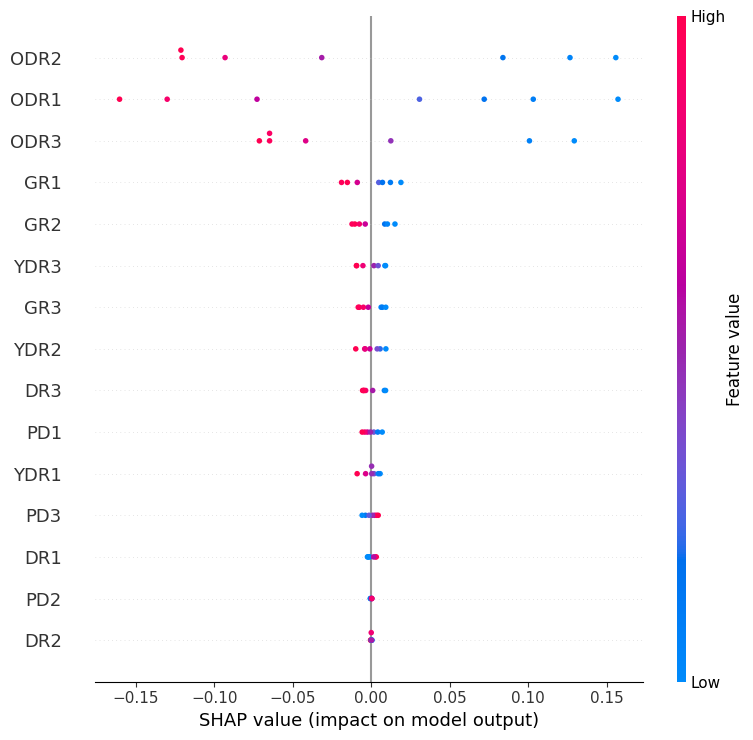

In [ ]:
shap.initjs()
#shap.summary_plot(shap_values, Xtest)
shap.summary_plot(shap_values, Xtest, feature_names=['GR1', 'GR2', 'GR3', 'PD1', 'PD2', 'PD3',
                                                     'DR1', 'DR2', 'DR3', 'YDR1','YDR2', 'YDR3',
                                                     'ODR1', 'ODR2', 'ODR3'])

* Force Plot

In [ ]:
shap.initjs()
shap.force_plot(ex.expected_value[0], shap_values[0,:], Xtest[0,:])

# Local Interpretable Model-agnostic Explanations

In [ ]:
%pip install lime
from lime import lime_tabular
from lime.lime_tabular import LimeTabularExplainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7bd625208d5c4ff2c8af467a844fede41e4027b462913c57c248e12e1a5499d5
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
explainer = LimeTabularExplainer(training_data=np.array(Xtrain),
                                 feature_names=['GR1', 'GR2', 'GR3', 'PD1', 'PD2', 'PD3',
                                                'DR1', 'DR2', 'DR3', 'YDR1','YDR2','YDR3',
                                                'ODR1', 'ODR2', 'ODR3'],
                                 class_names=['Population'],
                                 mode='regression',
                                 random_state=101)

In [ ]:
i = 0
instance = Xtest[i]
exp = explainer.explain_instance(
                                 data_row=instance,
                                 predict_fn=model.predict,
                                 num_features=15
                                )

exp.show_in_notebook(show_table=True)
exp.save_to_file('explanation_1.html')

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
exp_weight = [x[1] for x in exp.as_map()[1]]
y_pred = model.predict(np.array([instance]))

print(np.mean(y_pred) + sum(exp_weight))
print(y_pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0.7075248830058416
[0.38759774]


> Aggregate weights


In [ ]:
def return_weights(exp):
    """Extract weights from LIME explanation object"""
    exp_list = exp.as_map()[1]
    exp_list = sorted(exp_list, key=lambda x: x[0])
    exp_weight = [x[1] for x in exp_list]
    return exp_weight
weights = []
# Create the explainer using training data
explainer = LimeTabularExplainer(training_data=np.array(Xtrain),
                                 feature_names=['GR1', 'GR2', 'GR3', 'PD1', 'PD2', 'PD3', 'DR1', 'DR2', 'DR3', 'YDR1',
       'YDR2', 'YDR3', 'ODR1', 'ODR2', 'ODR3'],
                                 class_names=['Population'],
                                 mode='regression',
                                 random_state=101)
# Iterate over the first 100 instances in the test set
for i in range(7):
    # Get an instance from the test set
    instance = Xtest[i]
    # Get the explanation for the instance
    exp = explainer.explain_instance(data_row=instance,
                                     predict_fn=model.predict,
                                     num_features=15)  # Number of features to display
    # Get the weights from the explanation
    exp_weight = return_weights(exp)
    weights.append(exp_weight)

# Convert the weights into a DataFrame
lime_weights = pd.DataFrame(data=weights, columns=['GR1', 'GR2', 'GR3',
                                                   'PD1', 'PD2', 'PD3',
                                                   'DR1', 'DR2', 'DR3',
                                                   'YDR1','YDR2', 'YDR3',
                                                   'ODR1', 'ODR2', 'ODR3'])

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
lime_weights.head()

,GR1,GR2,GR3,PD1,PD2,PD3,DR1,DR2,DR3,YDR1,YDR2,YDR3,ODR1,ODR2,ODR3
0,-0.042145,-0.038077,-0.032754,-0.014715,-0.008842,-0.005079,-0.006222,-0.012309,-0.015974,0.001117,0.031220,0.074290,0.111995,0.148425,0.128996
1,-0.044578,-0.038541,-0.032479,-0.012059,-0.006496,-0.000599,-0.009428,-0.011426,-0.012981,0.004621,0.032057,0.073323,0.108085,0.140274,0.124289
2,-0.039816,-0.036022,-0.035150,-0.017342,-0.009160,0.000950,-0.004210,-0.014640,-0.016959,0.002289,0.024788,0.074089,0.107742,0.142484,0.005566
3,-0.042926,-0.044335,-0.034323,-0.020445,-0.009670,-0.004866,-0.007659,-0.022359,-0.016048,0.005238,0.026773,0.069138,0.106856,0.000115,-0.064910
4,-0.050186,-0.032393,-0.029175,-0.018631,-0.008474,-0.006034,-0.004303,-0.009520,-0.016281,0.001292,0.029659,0.075743,0.000357,-0.053458,-0.107913


In [ ]:
np.shape(lime_weights)

(7, 15)

> Absolute Mean


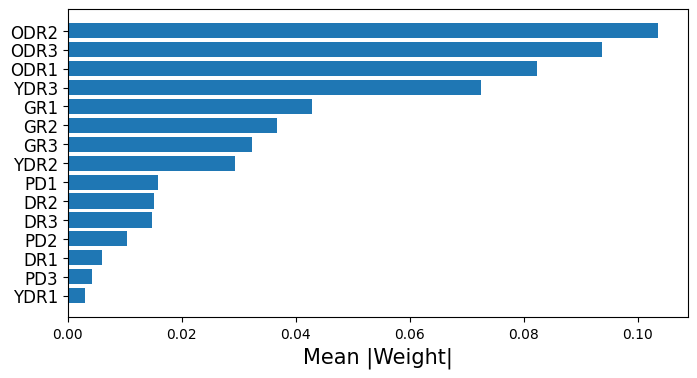

In [ ]:
# Calculate the absolute mean of LIME weights across features
abs_mean = lime_weights.abs().mean(axis=0)
abs_mean = pd.DataFrame(data={'feature': abs_mean.index, 'abs_mean': abs_mean})
abs_mean = abs_mean.sort_values('abs_mean')

# Plot the absolute mean weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
y_ticks = range(len(abs_mean))
y_labels = abs_mean.feature

plt.barh(y=y_ticks, width=abs_mean.abs_mean)
plt.yticks(ticks=y_ticks, labels=y_labels, size=12)
plt.xlabel('Mean |Weight|', size=15)

# Save figure
#utils.save_fig("average_weights")
plt.savefig("average_weights.png")

> Feature Trend


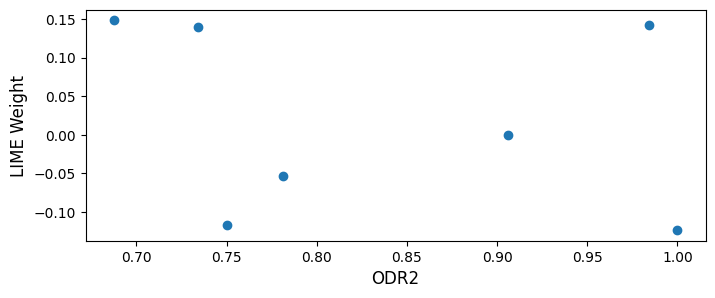

In [ ]:
# Scatter plot for 'ODR1' feature
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))

# Get LIME weights and feature values for 'ODR1'
feature_weight = lime_weights['ODR2']
feature_value = Xtest[0:7, 0]#Xtest['ODR1'][0:7]

plt.scatter(x=feature_value, y=feature_weight)
plt.ylabel('LIME Weight', size=12)
plt.xlabel('ODR2', size=12)

# Save figure
plt.savefig("scatter_weights_ODR2.png")#plt.save_fig("scatter_weights_ODR1")

> Beeswarm

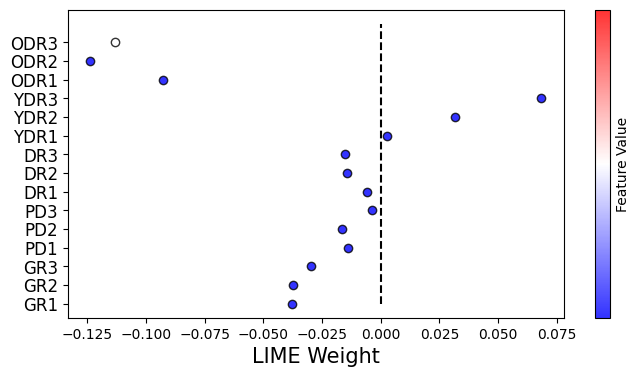

In [ ]:
# Plot the scatter plot for LIME weights and feature values
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# List of features for the current explanation
y_labels = ['GR1', 'GR2', 'GR3', 'PD1', 'PD2', 'PD3', 'DR1', 'DR2', 'DR3', 'YDR1',
       'YDR2', 'YDR3', 'ODR1', 'ODR2', 'ODR3']
y_ticks = range(len(y_labels))

# Iterate over the features and plot the scatter plot
for i, feature in enumerate(y_labels):

    # Get the LIME weight and feature values for the explained instance
    feature_weight = exp_weight[i]  # Using weights from explanation
    feature_value = instance[i]  # Using the instance feature values

    # Plot the scatter points
    plt.scatter(x=feature_weight,
                y=[i],
                c=[feature_value],  # Single instance, so a single feature value
                cmap='bwr',
                edgecolors='black',
                alpha=0.8)

# Add a vertical line at x=0
plt.vlines(x=0, ymin=0, ymax=len(y_labels), colors='black', linestyles="--")

# Add colorbar to indicate feature values
plt.colorbar(label='Feature Value', ticks=[])

# Set y-axis ticks and labels
plt.yticks(ticks=y_ticks, labels=y_labels, size=12)

# Label x-axis
plt.xlabel('LIME Weight', size=15)

# Save the figure
plt.savefig("lime_beeswarm_scatterplot.png")

# ***SARIMAX***

In [1]:
%pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings("ignore")
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv('/content/cleaned data.csv')
data= data.rename(columns={
    'Growth Rate': 'GR',
    'Population Density (per sq km)': 'PD',
    'Dependency Ratio': 'DR',
    'Youth Dependency Ratio': 'YDR',
    'Old Age Dependency Ratio': 'ODR'})


data = data[['Year', 'Population','GR', 'PD', 'DR', 'YDR', 'ODR']].set_index('Year')
data.head()

,Population,GR,PD,DR,YDR,ODR
Year,,,,,,
1991-01-01,57573614.0,0.33,238.0,0.000093,0.000051,0.000042
1992-01-01,57735939.0,0.23,238.6,0.000094,0.000052,0.000042
1993-01-01,57854242.0,0.18,239.1,0.000094,0.000052,0.000042
1994-01-01,58005686.0,0.35,239.8,0.000094,0.000052,0.000042
1995-01-01,58186803.0,0.28,240.5,0.000094,0.000052,0.000042


In [5]:
data['GR Lag 7']  = data['GR'].shift(7)
data['PD Lag 7']  = data['PD'].shift(7)
data['DR Lag 7']  = data['DR'].shift(7)
data['YDR Lag 7'] = data['YDR'].shift(7)
data['ODR Lag 7'] = data['ODR'].shift(7)
data.fillna(data.median(), inplace=True)
data = data.drop(columns=['GR', 'PD', 'DR', 'YDR', 'ODR'])
data.head()

,Population,GR Lag 7,PD Lag 7,DR Lag 7,YDR Lag 7,ODR Lag 7
Year,,,,,,
1991-01-01,57573614.0,0.57,248.5,0.000086,0.000046,0.000041
1992-01-01,57735939.0,0.57,248.5,0.000086,0.000046,0.000041
1993-01-01,57854242.0,0.57,248.5,0.000086,0.000046,0.000041
1994-01-01,58005686.0,0.57,248.5,0.000086,0.000046,0.000041
1995-01-01,58186803.0,0.57,248.5,0.000086,0.000046,0.000041


In [6]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['Population'],
                          exogenous=data[['GR Lag 7', 'PD Lag 7', 'DR Lag 7', 'YDR Lag 7', 'ODR Lag 7']],
                          trace=True,
                          suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=762.081, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=762.374, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=763.162, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=766.363, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=763.367, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.502 seconds


In [7]:
order = stepwise_fit.order
seasonal_order =stepwise_fit.seasonal_order
bestmodel = auto_arima(data['Population'],
                       exog=data[['GR Lag 7', 'PD Lag 7', 'DR Lag 7', 'YDR Lag 7', 'ODR Lag 7']],
                       trace=True,
                       suppress_warnings=True,
                       seasonal=True)
                       #m=12)
#m=12 Best model:  ARIMA(0,2,1)(2,0,0)[12]   Total fit time: 15.736 seconds
#m=1  Best model:  ARIMA(0,2,0)(0,0,0)[0]    Total fit time: 0.401 seconds

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=762.081, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=762.374, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=763.162, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=766.363, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=763.367, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.405 seconds


In [8]:
train_data = data[:int(0.8 * len(data))]
test_data = data[int(0.8 * len(data)):]
train_data.shape, test_data.shape

((27, 6), (7, 6))

In [9]:
import warnings
warnings.filterwarnings("ignore")
import time
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data['Population'],
                exog=train_data[['GR Lag 7', 'PD Lag 7', 'DR Lag 7', 'YDR Lag 7', 'ODR Lag 7']],
                order=bestmodel.order,
                seasonal_order=bestmodel.seasonal_order)

start = time.time()
model_fit = model.fit()
end = time.time()
print('Model Fitting Time', end - start)

Model Fitting Time 0.025447845458984375


* SARIMAX Summary

In [10]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Population   No. Observations:                   27
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -324.655
Date:                Tue, 29 Oct 2024   AIC                            661.309
Time:                        04:41:21   BIC                            668.623
Sample:                    01-01-1991   HQIC                           663.338
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GR Lag 7    4.708e+04   1.83e+06      0.026      0.979   -3.54e+06    3.63e+06
PD Lag 7    5.756e+04   7.29e+05      0.079      0.937   -1.37e+06    1.49e+06
DR Lag 7    4.356e+11   4.31e+11      1.011      0.3

In [11]:
#get the predictions
predictions = model_fit.forecast(
                                 steps=len(test_data),
                                 exog=test_data[['GR Lag 7', 'PD Lag 7', 'DR Lag 7', 'YDR Lag 7', 'ODR Lag 7']])
predictions = pd.Series(predictions, index=test_data.index)
#residuals = test_data - predictions

In [12]:
predictions

,predicted_mean
Year,
2018-01-01,6.623985e+07
2019-01-01,6.674243e+07
2020-01-01,6.721310e+07
2021-01-01,6.768424e+07
2022-01-01,6.812794e+07
2023-01-01,6.856297e+07
2024-01-01,6.899590e+07


* SARIMAX Plot

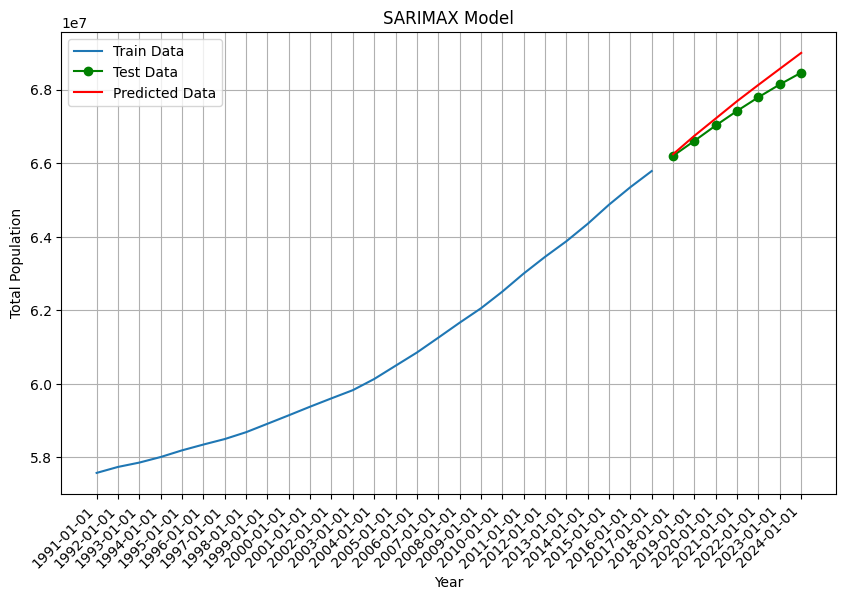

Root Mean Squared Error (SARIMAX)       :318308.50
Mean Absolute Percentage Error (SARIMAX):0.41%


In [17]:
predictions = model_fit.get_forecast(steps=len(test_data),
                                     exog=test_data[['GR Lag 7', 'PD Lag 7', 'DR Lag 7', 'YDR Lag 7', 'ODR Lag 7']])

test_data['Predicted SARIMAX'] = predictions.predicted_mean#(Series)

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Population'],       label="Train Data")
plt.plot(test_data.index,  test_data['Population'],        label="Test Data",      color='green', marker='o')
plt.plot(test_data.index,  test_data['Predicted SARIMAX'], label="Predicted Data", color='red')

plt.title("SARIMAX Model")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.show()

SArmse = np.sqrt(((test_data['Population']- test_data['Predicted SARIMAX']) ** 2).mean())
print(f"Root Mean Squared Error (SARIMAX)       :{SArmse:.2f}")

def cal_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual-predicted)/actual))*100

SARIMAmape=cal_mape(test_data['Population'],test_data['Predicted SARIMAX'])
print(f"Mean Absolute Percentage Error (SARIMAX):{SARIMAmape:.2f}%")

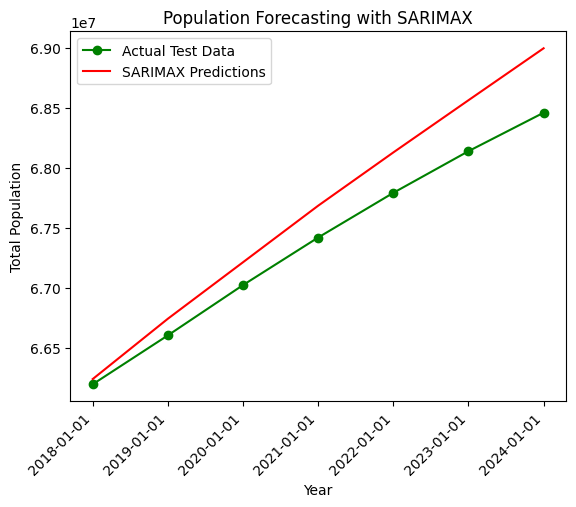

In [18]:
plt.plot(test_data.index,  test_data['Population'],       label="Actual Test Data",   color='green', marker='o')
plt.plot(test_data.index,  test_data['Predicted SARIMAX'], label="SARIMAX Predictions", color='red')

plt.title("Population Forecasting with SARIMAX")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()